In [3]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import zipfile
import urllib.request
import os
import matplotlib.pyplot as plt
import shutil
from PIL import Image, ImageDraw
import random

# Full metadata scraping

Actuellement, aucun des fichiers n'est satisfaisant. Seul lido possède assez d'informations, mais il est bien trop volumineux pour être facilement exploitable.

# CSV file processing and image scraping

In [4]:
all_df = pd.read_csv("202001-rma-csv-collection.csv")

FileNotFoundError: [Errno 2] File 202001-rma-csv-collection.csv does not exist: '202001-rma-csv-collection.csv'

In [3]:
all_df.head()

,objectInventoryNumber,objectPersistentIdentifier,objectTitle[1],objectType[1],objectCreator[1],objectCreationDate[1],objectImage
0,-1RP-F-2001-7-1480,http://hdl.handle.net/10934/RM0001.COLLECT.704235,Les artistes belges,boek,NaN,NaN,NaN
1,2RP-F-2001-7-1020-41,http://hdl.handle.net/10934/RM0001.COLLECT.678849,Portret van Prescott H. Butler,fotomechanische afdruk,anonymous,1869,NaN
2,AK-BR-324,http://hdl.handle.net/10934/RM0001.COLLECT.321537,"Klokvormige kom met bleu poudré, draken en parels",kom,anonymous,1800,https://lh3.googleusercontent.com/S3wgRasrmmAk...
3,AK-BR-325,http://hdl.handle.net/10934/RM0001.COLLECT.3866,Eivormige vaas met een rood glazuur,vaas,anonymous,1800,https://lh3.googleusercontent.com/kc2u8EkKqRbD...
4,AK-BR-367,http://hdl.handle.net/10934/RM0001.collect.163127,Ronde doos met goudlak,doos,NaN,1775,https://lh3.ggpht.com/JNbJGaB7EIJqolKXACtFVcYZ...


In [4]:
all_df = all_df.rename(columns =
                       {"objectInventoryNumber":"inventoryNumber","objectPersistentIdentifier":"identifier",
                        "objectTitle[1]":"title","objectType[1]":"type","objectCreator[1]":"creator",
                        "objectCreationDate[1]":"creationDate","objectImage":"imageUrl"})

In [5]:
art_types = list(all_df["type"].drop_duplicates())

In [6]:
paintings_df = all_df[all_df.type == "schilderij"]

In [7]:
def get_image(persistentID, url, path):
    if not os.path.exists(path):
        urllib.request.urlretrieve(url,path)

In [8]:
paintings_images_df = paintings_df[["identifier","imageUrl"]].dropna()

In [9]:
paintings_images_df.apply(lambda row: get_image(row.identifier, row.imageUrl,"images_rijk/{}.jpg"\
                             .format(row.identifier.split(".")[-1])), axis = 1)
print()

In [10]:
len(paintings_images_df)

4313

In [11]:
paintings_images_df["image_identifier"] = paintings_images_df.identifier.apply(lambda i : int(i.split(".")[-1]))

In [12]:
full_paintings_df = paintings_df.join(paintings_images_df["image_identifier"], how = "inner")

In [13]:
full_paintings_df.head()

,inventoryNumber,identifier,title,type,creator,creationDate,imageUrl,image_identifier
20435,BK-14656-309,http://hdl.handle.net/10934/RM0001.COLLECT.364536,Schilderij met voorstelling van de Madonna del...,schilderij,anonymous,1850,https://lh6.ggpht.com/-eNzYT1xnhAtFqOvHeK4DAxp...,364536
20443,BK-14656-310,http://hdl.handle.net/10934/RM0001.COLLECT.364537,Schilderij met voorstelling van een meisje met...,schilderij,anonymous,1850,https://lh4.ggpht.com/eXqEMw6pd-GCzNhE5wKBuPLG...,364537
20444,BK-14656-311,http://hdl.handle.net/10934/RM0001.COLLECT.364538,Schilderij met voorstelling van een vrouw met ...,schilderij,anonymous,1850,https://lh5.ggpht.com/J-iU8SYOU5axj7388NdQ5xfS...,364538
20445,BK-14656-312,http://hdl.handle.net/10934/RM0001.COLLECT.364540,Schilderij met voorstelling van een vrouw met ...,schilderij,anonymous,1850,https://lh6.ggpht.com/hm_GqMvAxb7bm9rCAPbHNTIJ...,364540
44151,BK-2011-38,http://hdl.handle.net/10934/RM0001.COLLECT.506083,Behangselschildering met een Hollands landscha...,schilderij,"Andriessen, Jurriaan",1776,https://lh6.ggpht.com/atPdLx1MEE2to5Lo95ggKIKG...,506083


# Traduction

In [14]:
#translator = word2word.Word2word("nl","fr")

#file = open("translations_types.txt","w")

#for expr in tqdm(art_types):
#    file.write(str(expr)+" ->")
#    for word in str(expr).split():
#        try:
#            file.write(" " + str(translator(str(word))) + " ")
#        except:
#            file.write(" UNKNOWN ")
#    file.write("\n")    

#file.close()

# Picture choice before pose estimation

In [15]:
# Créer une fonction simple similaire à celle "after".

# Puis créer une fonction qui copie les images choisies dans un nouveau dossier selected_rijk

def decide_picture_before(identifier):
        
    path = "images_rijk/{}.jpg".format(identifier)
    
    im = Image.open(path)
    
    plt.figure(figsize = (5,5))
    plt.imshow(np.asarray(im))
    plt.show()
    
    answer = input("Keep ? (y/n)")
    
    plt.clf()
    
    if answer in ["yes","y","oui","1"]:
        shutil.copyfile(path, "images_rijk_selected/{}.jpg".format(identifier))
        return 1
    
    if answer ==  "break":
        return "break"
    
    else:
        return 0

# Pose merging

In [16]:
def normalize_posenet_vector(vecteur):
    
    x_components, y_components = zip(*vecteur)
    
    x_components, y_components = np.array(x_components), np.array(y_components)
    
    
    max_amplitude = max(max(x_components)-min(x_components),max(y_components)-min(y_components))
    
    amplification_factor = 1/max_amplitude
    
    x_components = amplification_factor*x_components
    y_components = amplification_factor*y_components
    
    def mean_extrema(array):
        return np.mean((max(array),min(array)))
    
    x_components, y_components =\
    x_components-mean_extrema(x_components) + 1/2, y_components-mean_extrema(y_components) + 1/2
    
    return list(zip(x_components, y_components))

In [17]:
def parse_posenet_json(df, json_name, normalise_function = lambda x: x):
    
    with open(json_name,"r") as json:
        
        text = json.read()
        
        dics = []
        
        for item in eval(text):
            image_name = item.get("filename")
            
            image_id = int(re.match("\d+",image_name).group())
            
            normalized_poses = list(map(normalise_function, item.get("poses")))
            
            dics.append({"image_identifier":image_id, "poses":poses, "norm_poses":normalized_poses})
    
    
    return df.merge(pd.DataFrame(dics), on = "image_identifier")

In [18]:
#poses_paintings_df = parse_posenet_json(full_paintings_df, "full_rijk.json", normalize_posenet_vector)

# Picture choice after pose estimation

In [19]:
def decide_picture_after(poses, identifier):
    
    path = "images_rijk/{}.jpg".format(identifier)
    
    for pose in poses:
                
        im = Image.open(path)
        width, height = im.size

        draw = ImageDraw.Draw(im)
        
        pose = list(map(lambda tup : (width*tup[0], height*tup[1]), pose))
        
        for point in pose[:5]:
            x = point[0]
            y = point[1]
            r = 5
            draw.ellipse([x-r,y-r,x+r,y+r],"red","red")

        for i in (5,6,11,12):
            draw.line([(pose[i][0],pose[i][1]),(pose[i+2][0],pose[i+2][1]),(pose[i+4][0],pose[i+4][1])],
                      fill = "red", width = 5)
    
    plt.figure(figsize = (10,10))
    plt.imshow(np.asarray(im))
    plt.show()
    
    answer = input("Keep ? (y/n)")
    
    plt.clf()
    
    if answer in ["y","yes","oui",1]:
        #shutil.copyfile(path, "images_rijk_final_selection/{}.jpg".format(identifier))
        return 1
    
    if answer ==  "break":
        return "break"

    return 0

In [20]:
#decide_picture_after([[[0.225274471454308,0.1963590063473594],[0.23855261639306605,0.1667285800444013],[0.2157057169927579,0.17282660090969693],[0.3961265099911578,0.15821083603202135],[0.25822377350268466,0.17708836919138865],[0.5442848754804844,0.2393879055513018],[0.34873925914830456,0.2640909026105116],[0.6077122152348635,0.37629565445829455],[0.2223435266574431,0.41274496182393466],[0.4251100142698287,0.34233220541987436],[0.1683537288133537,0.5116016688513848],[0.5640322499620392,0.4956168877939306],[0.38971169855828386,0.509914175545659],[0.4133634166413325,0.6477774015196566],[0.3033309244806781,0.6484600579228382],[0.39374695128422377,0.8859918701973407],[0.3640638992775907,0.8808107914163908]]], "test_vecteur_posenet/posenet_input.png")

# Picture selection pipeline

In [21]:
full_paintings_df["selected"] = np.nan
full_paintings_df["selected_final"] = np.nan
full_paintings_df.to_csv("raw_full_paintings_df.csv")

In [22]:
#Si nécessaire, load le full_paintings_df

Critères choix tableaux:
- Pas trop de gens
- Les personnages pas trop petits
- Les personnages pas trop entremêlés
- Portraits: portrait jusqu'à la ceinture au minimum. Les deux mains visibles.

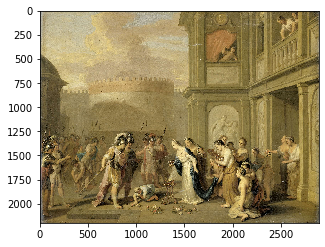

Keep ? (y/n)break


<Figure size 432x288 with 0 Axes>

In [23]:
full_paintings_df = pd.read_csv("partial_selected_full_paintings_df.csv")

for i, row in full_paintings_df.iterrows():
    if (row["selected"] != 0 and row["selected"] != 1):
        
        answer = decide_picture_before(row["image_identifier"])
        
        if answer == "break":
            break
        else:
            full_paintings_df.set_value(i,'selected',answer)

full_paintings_df.to_csv("temp_{}.csv".format(random.randint(0,1e10)))

In [55]:
full_paintings_df.to_csv("partial_selected_full_paintings_df.csv")

In [53]:
#Si nécessaire, load le full_paintings_df
np.sum(full_paintings_df.selected == 0)

287

In [ ]:
#poses_paintings_df = parse_posenet_json(full_paintings_df, "full_rijk.json", normalize_posenet_vector)